# Exercise 1: Image Classification

* PANAGIOTIS KAFANTARIS **p3352328**
* IOANNIS MICHALOPOULOS **p3352314**


In this exercise, we aim to build deep learning models that classify images into predefined categories using two different architectures: a **Multi-Layer Perceptron (MLP)** and a **Convolutional Neural Network (CNN)**. We evaluate their performance on two widely used image classification datasets:

1. **Fashion-MNIST** – A dataset of grayscale images (28x28) representing various fashion items such as shirts, shoes, and bags.
2. **CIFAR-10** – A dataset of color images (32x32, RGB) containing real-world objects like airplanes, cats, and cars.

We first implement an MLP model, which processes flattened image data and learns patterns using dense layers. Then, we build a CNN model, which is better suited for image classification as it preserves spatial relationships and efficiently extracts hierarchical features.

Both models are trained, evaluated, and compared to assess how architectural choices impact performance. Results show that CNNs significantly outperform MLPs, particularly on CIFAR-10, demonstrating the importance of convolutional layers in image-related tasks.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten,Conv2D, MaxPooling2D, Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist,cifar10
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns
from os import name
from sklearn.metrics import classification_report, confusion_matrix

# Fashion-MNIST Dataset

In this part, we will build and evaluate classifiers for the Fashion-MNIST dataset, which consists of grayscale images (28x28 pixels) of 10 different types of clothing. We will implement two different deep learning models: a Convolutional Neural Network (CNN) and a Multilayer Perceptron (MLP). Our goal is to preprocess the data, train both models, and compare their performance on this classification task.

## Load Data

We load the Fashion-MNIST dataset, which consists of images of 10 clothing categories. We visualize some indicative images from the training set and display their respective labels, mapping the numeric labels to their corresponding clothing category names. This helps us get an initial understanding of the data before training our models.

In [ ]:
# 1. Load Dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = fashion_mnist.load_data()

# 2. Preprocess Data
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0  # Normalize
# Apply to_categorical to y_train_mnist and y_test_mnist separately
y_train_mnist = to_categorical(y_train_mnist, 10)  # One-hot encoding for y_train_mnistF
y_test_mnist = to_categorical(y_test_mnist, 10)  # One-hot encoding for y_test_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


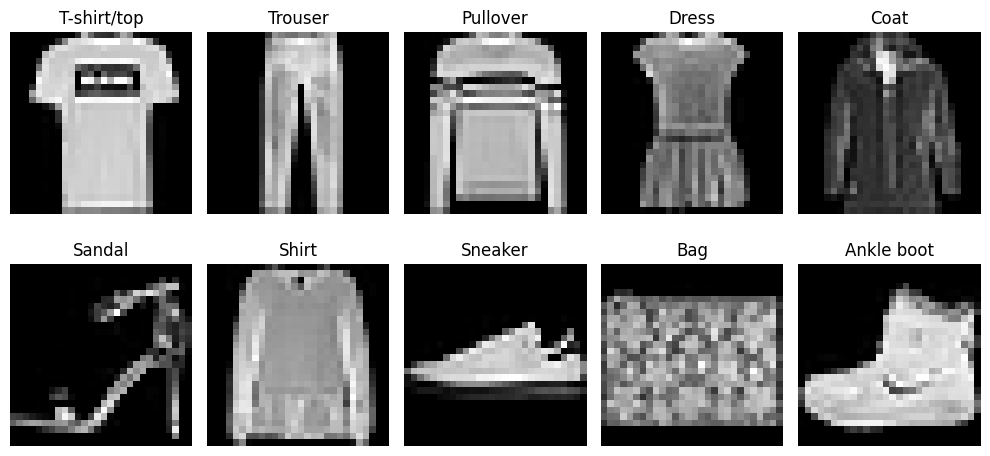

In [ ]:
# Define class names for the Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select one image per category
selected_images = []
selected_labels = []
for category in range(10):
    index = np.where(y_train_mnist.argmax(axis=1) == category)[0][0]  # Get first occurrence
    selected_images.append(x_train_mnist[index])
    selected_labels.append(class_names[category])

# Plot the images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i], cmap='gray')
    plt.title(selected_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()



## Fashion-MNIST Logistic Regression(Baseline)

In [ ]:
def build_logistic_regression_model(input_shape=(28, 28), num_classes=10):
    """Builds and returns a simple logistic regression model."""
    inputs = Input(shape=input_shape, name='Input')
    flat = Flatten(name='Flatten')(inputs)  # Flatten the 28x28 image into a 1D vector
    outputs = Dense(num_classes, activation='softmax', name='Output')(flat)  # Single linear layer
    model = Model(inputs=inputs, outputs=outputs, name="Logistic_Regression_Model")
    return model

# Define parameters
optimizer = Adam(learning_rate=0.001)
epochs = 100
batch_size = 32
patience = 5

# Build the model
mnist_logistic_model = build_logistic_regression_model()

# Compile the model
mnist_logistic_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
mnist_logistic_history = mnist_logistic_model.fit(
    x_train_mnist, y_train_mnist,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[early_stopping]
)

def evaluate_model(model, x_test, y_test):
    """Evaluates the model on the test data."""
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    return test_loss, test_acc

def print_model_summary(model):
    """Prints the model summary."""
    model.summary()


# Evaluate the model
evaluate_model(mnist_logistic_model, x_test_mnist, y_test_mnist)

# Print model summary
print_model_summary(mnist_logistic_model)

Epoch 1/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7357 - loss: 0.7919 - val_accuracy: 0.8228 - val_loss: 0.5034
Epoch 2/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8386 - loss: 0.4788 - val_accuracy: 0.8453 - val_loss: 0.4478
Epoch 3/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8470 - loss: 0.4442 - val_accuracy: 0.8505 - val_loss: 0.4325
Epoch 4/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8533 - loss: 0.4232 - val_accuracy: 0.8517 - val_loss: 0.4181
Epoch 5/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8564 - loss: 0.4131 - val_accuracy: 0.8540 - val_loss: 0.4200
Epoch 6/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8595 - loss: 0.4049 - val_accuracy: 0.8545 - val_loss: 0.4261
Epoch 7/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8615 - loss: 0.4001 - val_accuracy: 0.8557 - val_loss: 0.4120
Epoch 8/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8625 - loss: 0

Model: "Logistic_Regression_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,552 (92.00 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,702 (61.34 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.83      0.82      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.74      0.74      0.74      1000
       Dress       0.81      0.89      0.85      1000
        Coat       0.70      0.80      0.75      1000
      Sandal       0.94      0.93      0.94      1000
       Shirt       0.66      0.52      0.58      1000
     Sneaker       0.93      0.91      0.92      1000
         Bag       0.96      0.94      0.95      1000
  Ankle boot       0.93      0.96      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



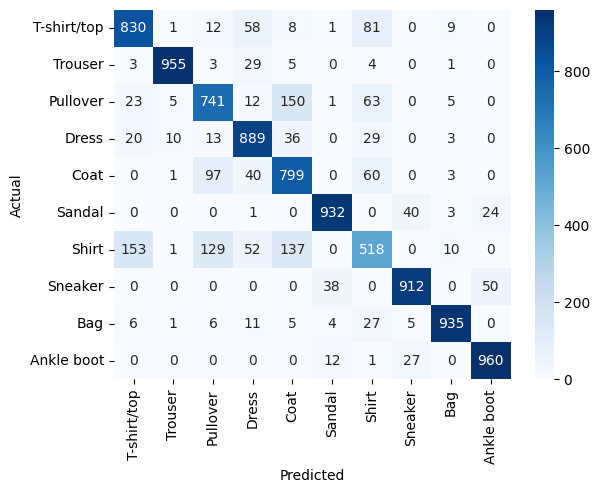

In [ ]:
# Plot classification report and confusion matrix

y_pred_classes = mnist_logistic_model.predict(x_test_mnist).argmax(axis=1)
y_true_classes = y_test_mnist.argmax(axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Fashion-MNIST MLP

### Building and Training the MLP Model

In this section, we build a Multi-Layer Perceptron (MLP) model using the functional API. The model consists of an input layer, two hidden layers, and an output layer. The input images are first flattened to convert the 28x28 pixel images into 1D vectors, which are then passed through two dense hidden layers. The final output layer uses the softmax activation function to predict one of 10 classes (clothing categories) for each input image.

We then compile the model with the Adam optimizer and categorical crossentropy loss function, train the model on the training set with early stopping to prevent overfitting, and evaluate the model's performance on the test set.

In [ ]:
# Parameters
optimizer = Adam(learning_rate=0.001)
epochs = 100
batch_size = 32
patience = 5

def build_mlp_model(input_shape=(28, 28), num_classes=10):
    """Builds and returns the MLP model using the functional API."""
    # Input layer
    inputs = Input(shape=input_shape, name='Input')

    # Flatten the input image
    flat = Flatten(name='Flatten')(inputs)  # Flatten the 28x28 image into a 1D vector

    # Hidden layers
    hidden1 = Dense(128, activation='relu', kernel_initializer='glorot_uniform', name='Hidden1')(flat)
    hidden2 = Dense(64, activation='relu', kernel_initializer='glorot_uniform', name='Hidden2')(hidden1)

    # Output layer
    outputs = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform', name='Output')(hidden2)

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name="MLP_Model")
    return model

def compile_model(model, optimizer, loss='categorical_crossentropy', metrics=['accuracy']):
    """Compiles the model."""
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

def train_model(model, x_train, y_train, epochs, batch_size, patience):
    """Trains the model with early stopping."""
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,  # Keep 10% for validation
        callbacks=[early_stopping]  # Apply early stopping to avoid overfitting
    )
    return history

def evaluate_model(model, x_test, y_test):
    """Evaluates the model on the test data."""
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    return test_loss, test_acc

def print_model_summary(model):
    """Prints the model summary."""
    model.summary()

# Building the MLP model
mnist_mlp_model = build_mlp_model()

# Compiling the model
compile_model(mnist_mlp_model, optimizer)

# Training the model
mnist_mlp_history = train_model(mnist_mlp_model, x_train_mnist, y_train_mnist, epochs, batch_size, patience)

# Evaluating the model
evaluate_model(mnist_mlp_model, x_test_mnist, y_test_mnist)

# Print model summary
print_model_summary(mnist_mlp_model)



Epoch 1/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7717 - loss: 0.6531 - val_accuracy: 0.8463 - val_loss: 0.4200
Epoch 2/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8636 - loss: 0.3806 - val_accuracy: 0.8685 - val_loss: 0.3552
Epoch 3/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8763 - loss: 0.3333 - val_accuracy: 0.8727 - val_loss: 0.3575
Epoch 4/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8840 - loss: 0.3134 - val_accuracy: 0.8793 - val_loss: 0.3298
Epoch 5/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8930 - loss: 0.2936 - val_accuracy: 0.8815 - val_loss: 0.3256
Epoch 6/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8967 - loss: 0.2749 - val_accuracy: 0.8855 - val_loss: 0.3160
Epoch 7/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9033 - loss: 0.2594 - val_accuracy: 0.8823 - val_loss: 0.3265
Epoch 8/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9044 - loss: 0

Model: "MLP_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

### Plotting and Evaluating the Model's Performance
In this section, we visualize the model's performance by plotting the training and validation accuracy and loss over the epochs. These plots provide insight into how well the model is learning and generalizing. Additionally, we print the final accuracy and loss for both the training and test datasets, offering a quantitative evaluation of the model's performance after training.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8768 - loss: 0.3400
Test Accuracy: 0.8797
Test Loss: 0.3397


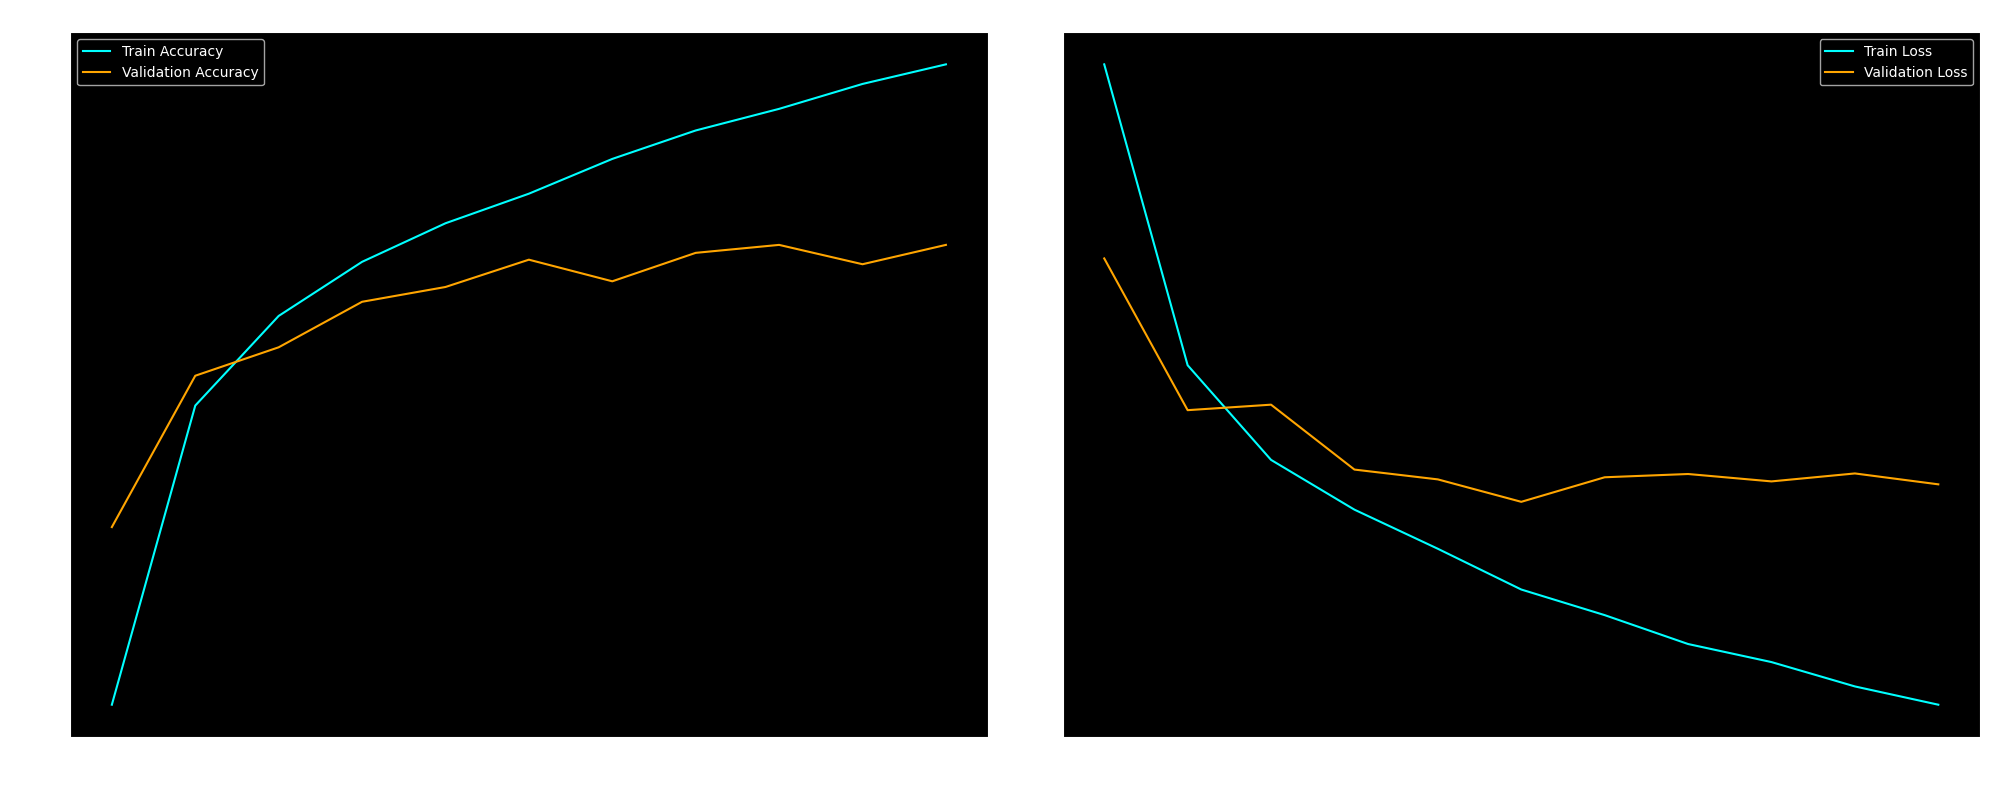

Train Loss     : 0.22926
Validation Loss: 0.32347
Test Loss      : 0.33974
---
Train Accuracy     : 0.91411
Validation Accuracy: 0.88767
Test Accuracy      : 0.87970


In [ ]:
# Retrieve accuracy and loss data from training history
train_accuracy = mnist_mlp_history.history['accuracy']
val_accuracy = mnist_mlp_history.history['val_accuracy']
train_loss = mnist_mlp_history.history['loss']
val_loss = mnist_mlp_history.history['val_loss']
test_loss, test_acc = evaluate_model(mnist_mlp_model, x_test_mnist, y_test_mnist)


# Set up the figure
plt.figure(figsize=(20, 8))
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [15, 8]

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy', color='cyan')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', color='cyan')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()



print("Train Loss     : {0:.5f}".format(mnist_mlp_history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(mnist_mlp_history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(test_loss))
print("---")
print("Train Accuracy     : {0:.5f}".format(mnist_mlp_history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(mnist_mlp_history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(test_acc))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.88      0.84      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.78      0.81      0.80      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.79      0.81      0.80      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.75      0.61      0.67      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



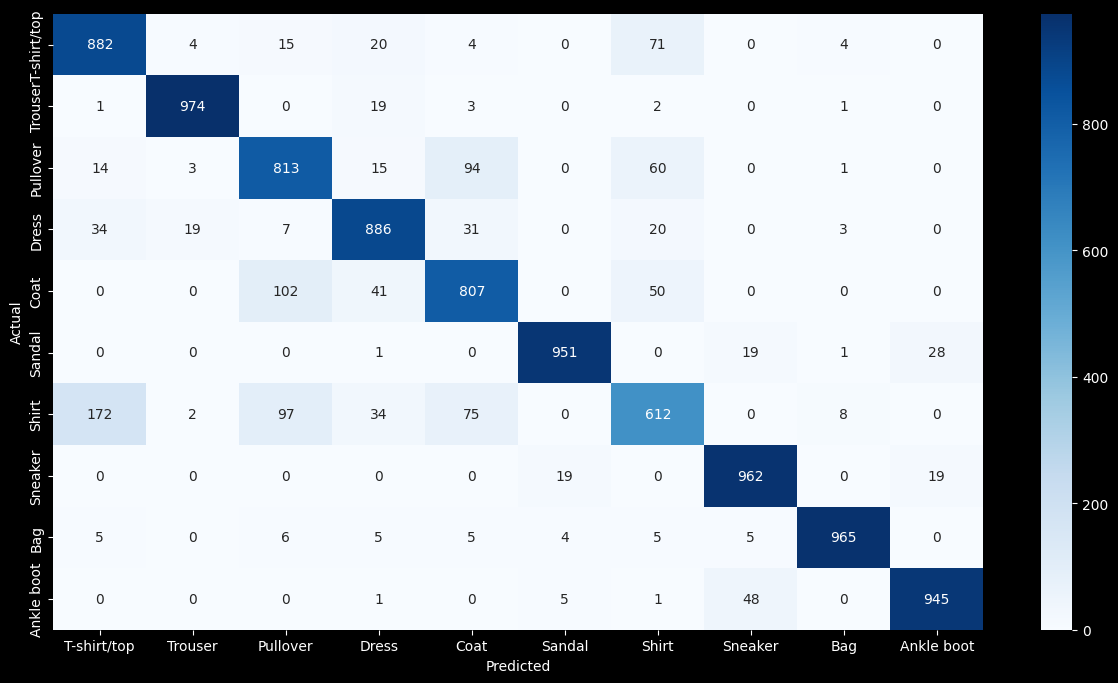

In [ ]:
# Plot classification report and confusion matrix for the test set

y_pred_classes = mnist_mlp_model.predict(x_test_mnist).argmax(axis=1)
y_true_classes = y_test_mnist.argmax(axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Visualizing Predictions
In this section, we visualize some random and incorrect predictions made by the model. We first identify the indices of the wrong predictions by comparing the predicted and actual labels. Then, we plot the first 5 test images where the model made incorrect predictions, displaying both the predicted and actual labels for each image.

From the incorrect predictions, it appears that the model has captured the general idea of the objects, such as recognizing that an item is a type of shoe but misclassifying it as a sandal instead of a sneaker. This helps us understand where the model struggles and provides insights into its misclassifications.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


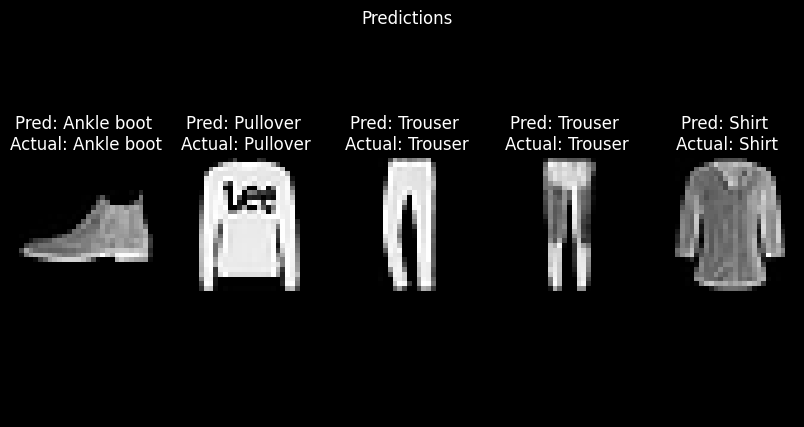

In [ ]:
# Get predictions
predictions = mnist_mlp_model.predict(x_test_mnist)

# Plot first 5 test images with predicted labels
plt.figure(figsize=(10, 5))
plt.title("Predictions")
plt.axis("off")
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_mnist[i], cmap="gray")
    predicted_label = np.argmax(predictions[i])  # Get the class with the highest probability
    actual_label = np.argmax(y_test_mnist[i])  # Get the actual label
    plt.title(f"Pred: {class_names[predicted_label]} \nActual: {class_names[actual_label]}")
    plt.axis("off")

plt.show()


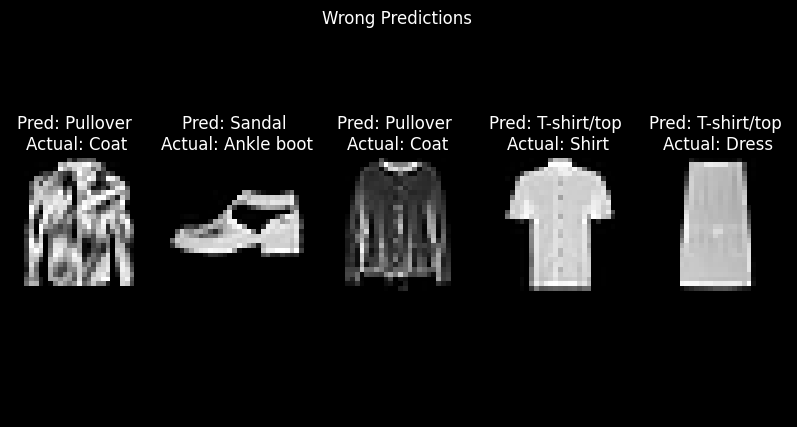

In [ ]:
# Identify wrong predictions
wrong_pred = []

for i in range(predictions.shape[0]):
    if np.argmax(predictions[i]) != np.argmax(y_test_mnist[i]):
        wrong_pred.append(i)

# Plot first 5 test images with wrong predicted label
plt.figure(figsize=(10, 5))
plt.title("Wrong Predictions")
plt.axis("off")
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_mnist[wrong_pred[i]], cmap="gray")
    predicted_label = np.argmax(predictions[wrong_pred[i]])  # Get the class with the highest probability
    actual_label = np.argmax(y_test_mnist[wrong_pred[i]])  # Get the actual label
    plt.title(f"Pred: {class_names[predicted_label]} \nActual: {class_names[actual_label]}")
    plt.axis("off")

plt.show()

## Fashion-MNIST CNN

### Building and Training the CNN Model

In this section, we build a Convolutional Neural Network (CNN) to classify Fashion-MNIST images. The dataset is first preprocessed by normalizing pixel values and reshaping the images to fit the CNN's input format.

The model architecture consists of:

* Two convolutional layers (Conv2D) with ReLU activation to extract spatial
patterns from images.
* Max pooling layers to reduce dimensionality and computational complexity while preserving essential features.
* A fully connected dense layer with 128 neurons to process the extracted features.
* A dropout layer (0.5) to prevent overfitting by randomly deactivating neurons during training.
*A softmax output layer that classifies the images into 10 categories.

To optimize training, we implement early stopping, which stops training if validation loss stops improving, preventing overfitting. Additionally, learning rate reduction lowers the learning rate when progress slows down, helping the model refine its weights for better accuracy. Finally, the model is trained and evaluated to assess its generalization on test data.

In [ ]:
# Build CNN Model using Functional API
def build_cnn_model():
    inputs = Input(shape=(28, 28, 1), name="Input")

    x = Conv2D(32, (3, 3), activation='relu', name="Conv1")(inputs)
    x = MaxPooling2D(2, 2, name="MaxPool1")(x)

    x = Conv2D(64, (3, 3), activation='relu', name="Conv2")(x)
    x = MaxPooling2D(2, 2, name="MaxPool2")(x)

    x = Flatten(name="Flatten")(x)
    x = Dense(128, activation='relu', name="Dense1")(x)
    x = Dropout(0.5, name="Dropout")(x)

    outputs = Dense(10, activation='softmax', name="Output")(x)

    model = Model(inputs=inputs, outputs=outputs, name="FashionMNIST_CNN")
    return model

# Compile Model
def compile_model(model, optimizer):
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Model
def train_model(model, x_train, y_train, epochs, batch_size):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.1,
                        callbacks=[early_stopping, reduce_lr])
    return history

# Evaluate Model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    return test_loss, test_acc

# Define Parameters
optimizer = Adam(learning_rate=0.001)
epochs = 100
batch_size = 32

# Run Workflow

mnist_cnn_model = build_cnn_model()
mnist_cnn_model = compile_model(mnist_cnn_model, optimizer)
mnist_cnn_history = train_model(mnist_cnn_model, x_train_mnist, y_train_mnist, epochs, batch_size)
evaluate_model(mnist_cnn_model, x_test_mnist, y_test_mnist)

# Print model summary
mnist_cnn_model.summary()

Epoch 1/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7148 - loss: 0.7925 - val_accuracy: 0.8665 - val_loss: 0.3691 - learning_rate: 0.0010
Epoch 2/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8534 - loss: 0.4072 - val_accuracy: 0.8837 - val_loss: 0.3065 - learning_rate: 0.0010
Epoch 3/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8764 - loss: 0.3383 - val_accuracy: 0.8927 - val_loss: 0.2771 - learning_rate: 0.0010
Epoch 4/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8909 - loss: 0.3045 - val_accuracy: 0.9037 - val_loss: 0.2596 - learning_rate: 0.0010
Epoch 5/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8978 - loss: 0.2815 - val_accuracy: 0.9047 - val_loss: 0.2559 - learning_rate: 0.0010
Epoch 6/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9036 - loss: 0.2661 - val_accuracy: 0.9072 - val_loss: 0.2472 - learning_rate: 0.0010
Epoch 7/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.

Model: "FashionMNIST_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1 (Conv2D)                       │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool1 (MaxPooling2D)              │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2 (MaxPooling2D)              │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

### Plotting and Evaluating the CNN Model Performance

We plot the training and validation accuracy and loss over the epochs to analyze the model’s learning progress. Additionally, we display the overall accuracy for the training, validation, and test sets.

By comparing the results with the previous MLP model, we observe that using a CNN improved the test accuracy by nearly 3%. This demonstrates that convolutional layers are more effective at capturing spatial patterns in image data, leading to better classification performance.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9111 - loss: 0.2624
Test Accuracy: 0.9143
Test Loss: 0.2514


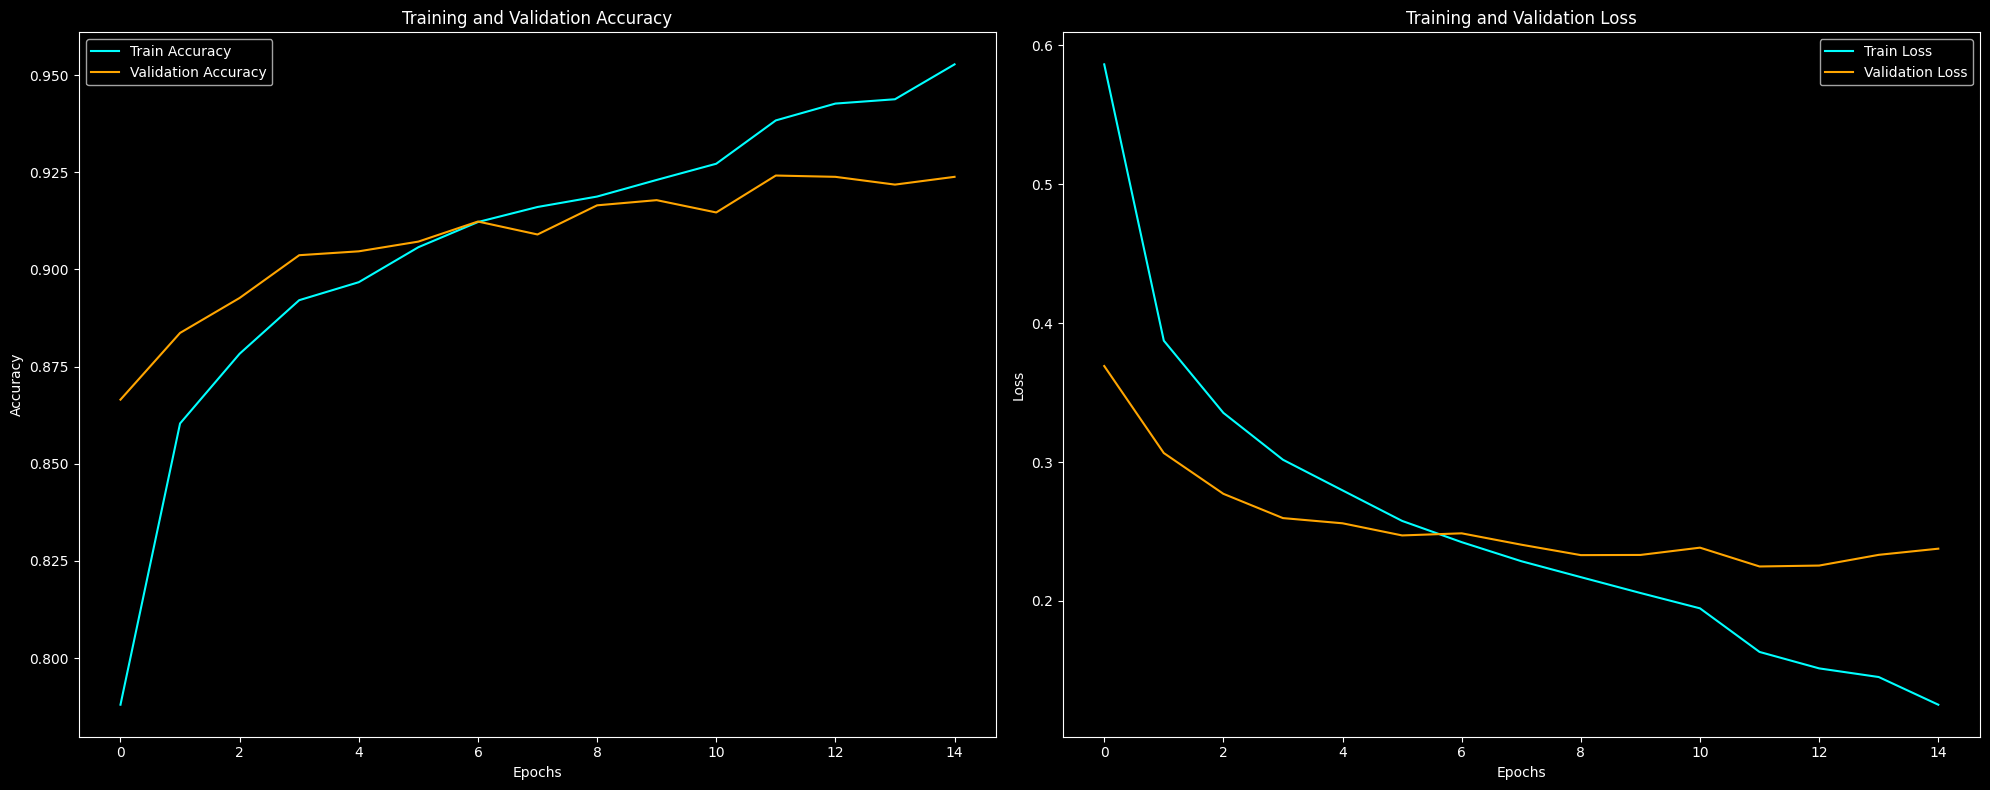

Train Loss     : 0.12537
Validation Loss: 0.23764
Test Loss      : 0.25143
---
Train Accuracy     : 0.95278
Validation Accuracy: 0.92383
Test Accuracy      : 0.91430


In [ ]:
# Retrieve accuracy and loss data from training history
train_accuracy = mnist_cnn_history.history['accuracy']
val_accuracy = mnist_cnn_history.history['val_accuracy']
train_loss = mnist_cnn_history.history['loss']
val_loss = mnist_cnn_history.history['val_loss']
test_loss, test_acc = evaluate_model(mnist_cnn_model, x_test_mnist, y_test_mnist)


# Set up the figure
plt.figure(figsize=(20, 8))
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [15, 8]

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy', color='cyan')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', color='cyan')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()



print("Train Loss     : {0:.5f}".format(mnist_cnn_history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(mnist_cnn_history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(test_loss))
print("---")
print("Train Accuracy     : {0:.5f}".format(mnist_cnn_history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(mnist_cnn_history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(test_acc))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.87      0.87      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.85      0.90      0.87      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.87      0.86      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.77      0.72      0.74      1000
     Sneaker       0.97      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



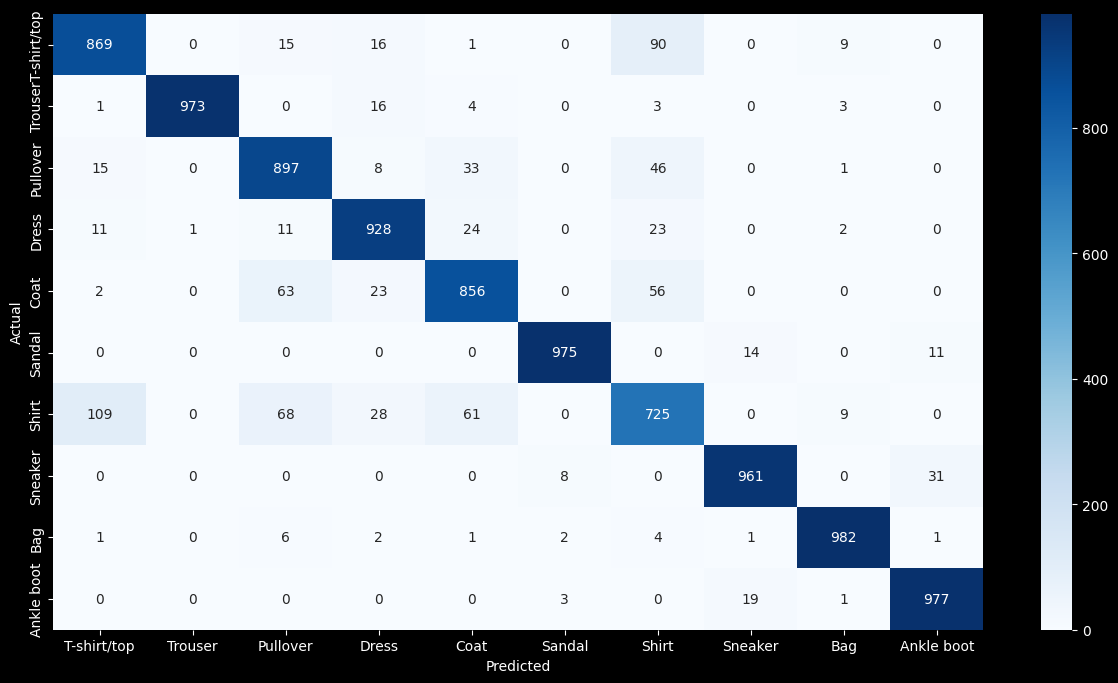

In [ ]:
# Plot classification report and confusion matrix for the test set

y_pred_classes = mnist_cnn_model.predict(x_test_mnist).argmax(axis=1)
y_true_classes = y_test_mnist.argmax(axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Visualizing Predictions for CNN

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


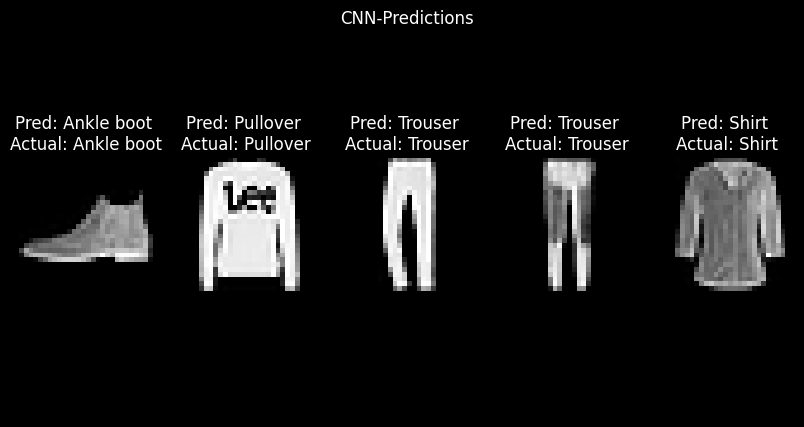

In [ ]:
# Get predictions
predictions = mnist_cnn_model.predict(x_test_mnist)

# Plot first 5 test images with predicted labels
plt.figure(figsize=(10, 5))
plt.title("CNN-Predictions")
plt.axis("off")
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_mnist[i], cmap="gray")
    predicted_label = np.argmax(predictions[i])  # Get the class with the highest probability
    actual_label = np.argmax(y_test_mnist[i])  # Get the actual label
    plt.title(f"Pred: {class_names[predicted_label]} \nActual: {class_names[actual_label]}")
    plt.axis("off")

plt.show()


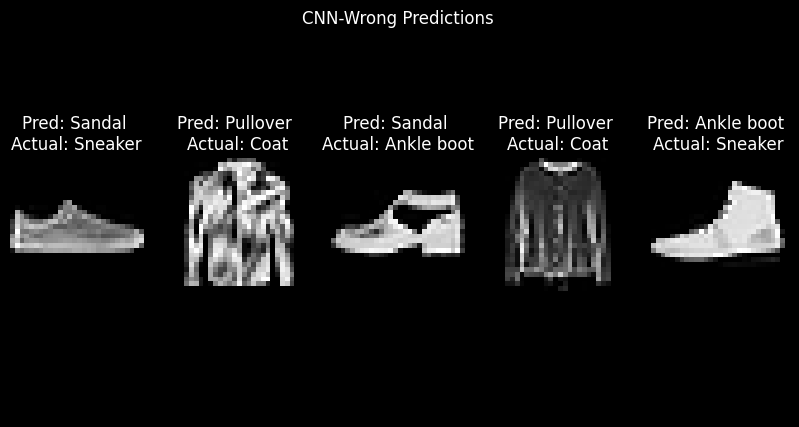

In [ ]:
# Identify wrong predictions
wrong_pred = []

for i in range(predictions.shape[0]):
    if np.argmax(predictions[i]) != np.argmax(y_test_mnist[i]):
        wrong_pred.append(i)

# Plot first 5 test images with wrong predicted label
plt.figure(figsize=(10, 5))
plt.title("CNN-Wrong Predictions")
plt.axis("off")
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_mnist[wrong_pred[i]], cmap="gray")
    predicted_label = np.argmax(predictions[wrong_pred[i]])  # Get the class with the highest probability
    actual_label = np.argmax(y_test_mnist[wrong_pred[i]])  # Get the actual label
    plt.title(f"Pred: {class_names[predicted_label]} \nActual: {class_names[actual_label]}")
    plt.axis("off")

plt.show()

# CIFAR-10 Dataset

CIFAR-10 is a dataset consisting of 60,000 color images (32x32 pixels) divided into 10 classes, such as airplanes, cars, birds, and dogs. Each class contains 6,000 images, with 50,000 for training and 10,000 for testing. Unlike Fashion-MNIST, CIFAR-10 includes more complex and diverse images, making it a more challenging classification task.

Each image in CIFAR-10 has three color channels (RGB), meaning it has three layers instead of a single grayscale layer, as seen in Fashion-MNIST. This adds complexity to the classification process, requiring models to learn from color information as well.

In this section, we will build and train both an MLP and a CNN to classify CIFAR-10 images. We will preprocess the dataset, define the models, train them, and compare their performance, similar to what we did with Fashion-MNIST. Given the nature of CIFAR-10 images, we expect the CNN to perform significantly better than the MLP.

## Load Data

In [ ]:
# 1. Load CIFAR-10 Dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

# 2. Preprocess Data
x_train_cifar, x_test_cifar = x_train_cifar / 255.0, x_test_cifar / 255.0  # Normalize pixel values
y_train_cifar, y_test_cifar = to_categorical(y_train_cifar, 10), to_categorical(y_test_cifar, 10)  # One-hot encoding

class_names_cifar10 = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


## CIFAR-10 Logistic Regression (Baseline)

In [ ]:
def build_logistic_regression_model(input_shape=(32, 32, 3), num_classes=10):
    """Builds and returns a simple logistic regression model."""
    inputs = Input(shape=input_shape, name='Input')
    flat = Flatten(name='Flatten')(inputs)  # Flatten the 28x28 image into a 1D vector
    outputs = Dense(num_classes, activation='softmax', name='Output')(flat)  # Single linear layer
    model = Model(inputs=inputs, outputs=outputs, name="Logistic_Regression_Model")
    return model

# Define parameters
optimizer = Adam(learning_rate=0.001)
epochs = 100
batch_size = 32
patience = 5

# Build the model
cifar_logistic_model = build_logistic_regression_model()

# Compile the model
cifar_logistic_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
cifar_logistic_history = cifar_logistic_model.fit(
    x_train_cifar, y_train_cifar,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[early_stopping]
)

def evaluate_model(model, x_test, y_test):
    """Evaluates the model on the test data."""
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    return test_loss, test_acc

def print_model_summary(model):
    """Prints the model summary."""
    model.summary()


# Evaluate the model
evaluate_model(cifar_logistic_model, x_test_cifar, y_test_cifar)

# Print model summary
print_model_summary(cifar_logistic_model)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2709 - loss: 2.0657 - val_accuracy: 0.3376 - val_loss: 1.9892
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3492 - loss: 1.8950 - val_accuracy: 0.3276 - val_loss: 1.9712
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3550 - loss: 1.8649 - val_accuracy: 0.3820 - val_loss: 1.8003
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3648 - loss: 1.8391 - val_accuracy: 0.3660 - val_loss: 1.8384
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3729 - loss: 1.8339 - val_accuracy: 0.3084 - val_loss: 2.0012
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3760 - loss: 1.8321 - val_accuracy: 0.3454 - val_loss: 1.8949
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3752 - loss: 1.8121 - val_accuracy: 0.3634 - val_loss: 1.8936
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3791 - loss: 1

Model: "Logistic_Regression_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │          30,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,192 (360.13 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,462 (240.09 KB)

## CIFAR-10 MLP

### Building and Training the MLP Model

In this section, we build a Multi-Layer Perceptron (MLP) to classify images from the CIFAR-10 dataset. Since CIFAR-10 consists of RGB images (32x32 pixels with 3 channels), we first flatten the input into a 1D vector before passing it through multiple dense layers.

The model consists of:

* An input layer that takes the flattened image data.
* Three hidden layers with ReLU activation to learn complex patterns.
* A softmax output layer to classify images into 10 categories.

We compile the model using the Adam optimizer and categorical cross-entropy loss.
The model is trained with early stopping to prevent overfitting and improve generalization. Finally, we evaluate its performance on the test set to measure how well it classifies unseen images. Given the complexity of CIFAR-10 images, we expect this MLP to have limited performance, and a CNN model should perform significantly better.

In [ ]:
# Parameters
optimizer = Adam(learning_rate=0.001)
epochs = 100
batch_size = 32
patience = 5

def build_mlp_model(input_shape=(32, 32, 3), num_classes=10):
    """Builds and returns the MLP model using the functional API."""
    # Input layer
    inputs = Input(shape=input_shape, name='Input')

    # Flatten the input image
    flat = Flatten(name='Flatten')(inputs)  # Flatten the 28x28 image into a 1D vector

    # Hidden layers
    hidden1 = Dense(128, activation='relu', kernel_initializer='glorot_uniform', name='Hidden1')(flat)
    hidden2 = Dense(64, activation='relu', kernel_initializer='glorot_uniform', name='Hidden2')(hidden1)
    hidden3 = Dense(32, activation='relu', kernel_initializer='glorot_uniform', name='Hidden3')(hidden2)

    # Output layer
    outputs = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform', name='Output')(hidden3)

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name="CIFAR_MLP_Model")
    return model

def compile_model(model, optimizer, loss='categorical_crossentropy', metrics=['accuracy']):
    """Compiles the model."""
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

def train_model(model, x_train, y_train, epochs, batch_size, patience):
    """Trains the model with early stopping."""
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,  # Keep 10% for validation
        callbacks=[early_stopping]  # Apply early stopping to avoid overfitting
    )
    return history

def evaluate_model(model, x_test, y_test):
    """Evaluates the model on the test data."""
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    return test_loss, test_acc

def print_model_summary(model):
    """Prints the model summary."""
    model.summary()

# Building the MLP model
cifar_mlp_model = build_mlp_model()

# Compiling the model
compile_model(cifar_mlp_model, optimizer)

# Training the model
cifar_mlp_history = train_model(cifar_mlp_model, x_train_cifar, y_train_cifar, epochs, batch_size, patience)

# Evaluating the model
evaluate_model(cifar_mlp_model, x_test_cifar, y_test_cifar)

# Print model summary
print_model_summary(cifar_mlp_model)



Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2379 - loss: 2.0405 - val_accuracy: 0.3200 - val_loss: 1.8643
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3680 - loss: 1.7569 - val_accuracy: 0.3730 - val_loss: 1.7267
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3953 - loss: 1.6787 - val_accuracy: 0.4028 - val_loss: 1.6515
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4154 - loss: 1.6210 - val_accuracy: 0.4084 - val_loss: 1.6317
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4270 - loss: 1.5921 - val_accuracy: 0.4354 - val_loss: 1.5961
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4395 - loss: 1.5615 - val_accuracy: 0.4482 - val_loss: 1.5491
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4478 - loss: 1.5429 - val_accuracy: 0.4170 - val_loss: 1.5948
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4551 - loss: 1

Model: "CIFAR_MLP_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden1 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,212,032 (4.62 MB)

 Trainable params: 404,010 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 808,022 (3.08 MB)

### Plotting and Evaluating the MLP Performance for CIFAR-10

We visualize the training and validation accuracy and loss over epochs to analyze the model's learning behavior. Additionally, we display the overall accuracy for the training, validation, and test sets.

The results show that the test accuracy is very low, around 49%, indicating that the MLP struggles with the CIFAR-10 dataset. This is expected, as CIFAR-10 consists of complex RGB images, and an MLP does not effectively capture spatial relationships within the images. However the performance increased compared to the baseline model(from 38%)

This highlights the need for a CNN model, which is better suited for image classification tasks due to its ability to extract spatial features using convolutional layers.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4787 - loss: 1.4750
Test Accuracy: 0.4761
Test Loss: 1.4792


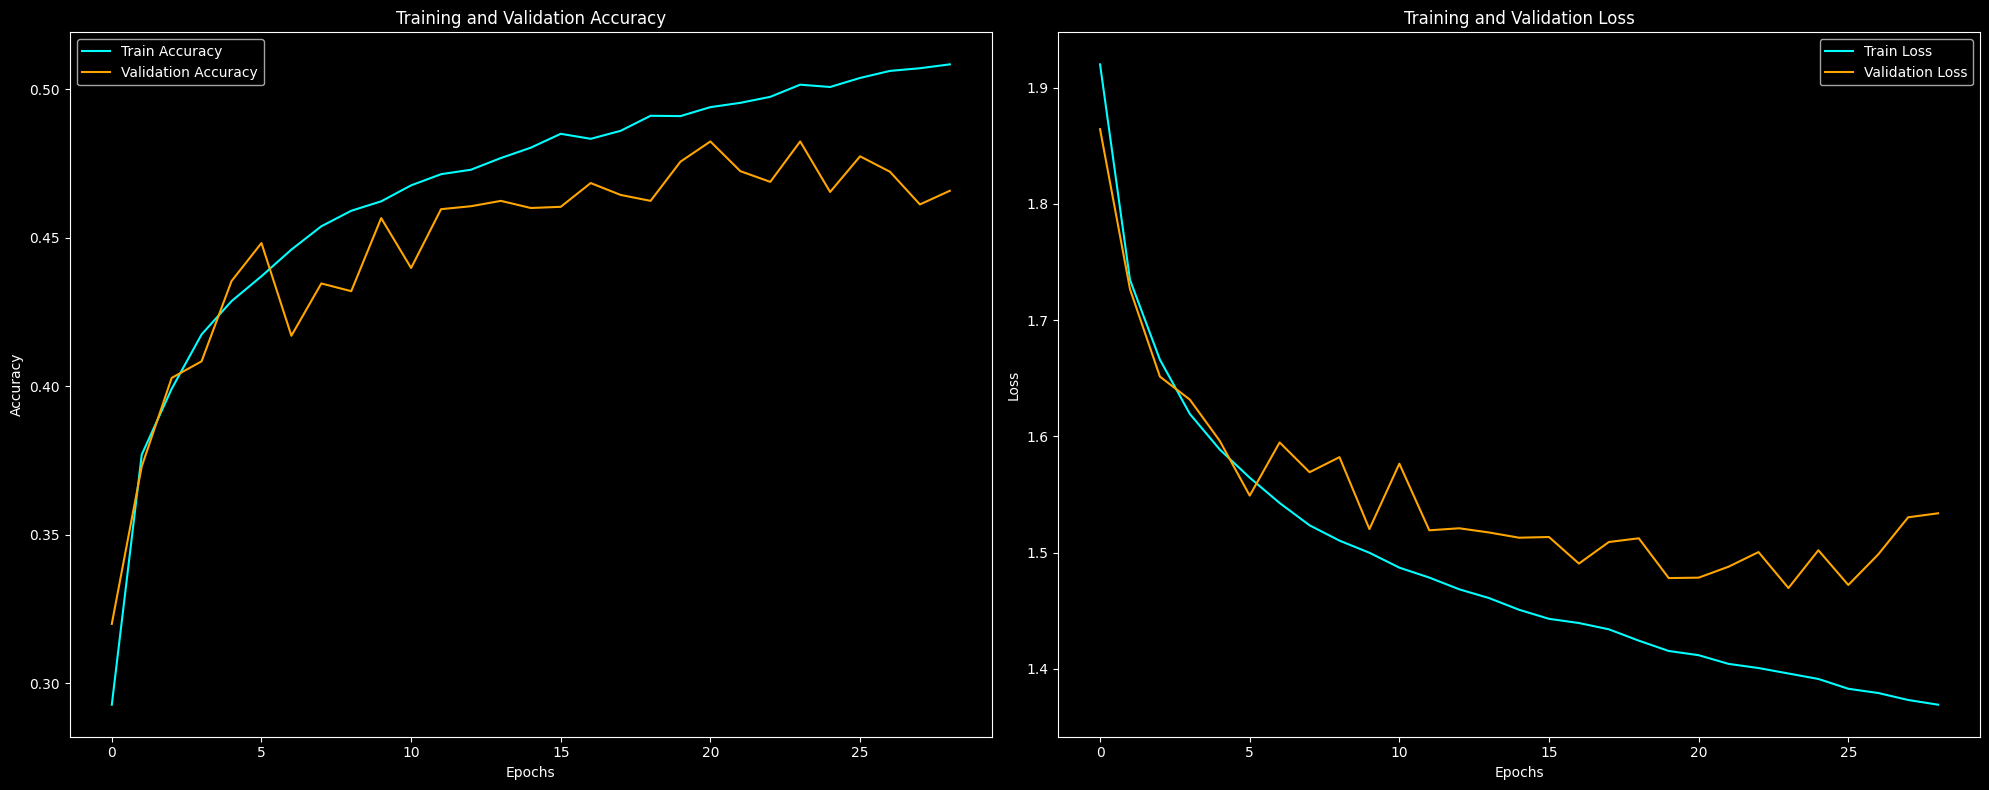

Train Loss     : 1.36921
Validation Loss: 1.53386
Test Loss      : 1.47919
---
Train Accuracy     : 0.50836
Validation Accuracy: 0.46580
Test Accuracy      : 0.47610


In [ ]:
# Retrieve accuracy and loss data from training history
train_accuracy = cifar_mlp_history.history['accuracy']
val_accuracy = cifar_mlp_history.history['val_accuracy']
train_loss = cifar_mlp_history.history['loss']
val_loss = cifar_mlp_history.history['val_loss']
test_loss, test_acc = evaluate_model(cifar_mlp_model, x_test_cifar, y_test_cifar)


# Set up the figure
plt.figure(figsize=(20, 8))
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [15, 8]

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy', color='cyan')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', color='cyan')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()



print("Train Loss     : {0:.5f}".format(cifar_mlp_history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(cifar_mlp_history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(test_loss))
print("---")
print("Train Accuracy     : {0:.5f}".format(cifar_mlp_history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(cifar_mlp_history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    Airplane       0.49      0.59      0.54      1000
  Automobile       0.58      0.59      0.59      1000
        Bird       0.39      0.28      0.33      1000
         Cat       0.31      0.25      0.28      1000
        Deer       0.44      0.38      0.41      1000
         Dog       0.45      0.32      0.37      1000
        Frog       0.40      0.70      0.51      1000
       Horse       0.55      0.53      0.54      1000
        Ship       0.61      0.58      0.60      1000
       Truck       0.53      0.53      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



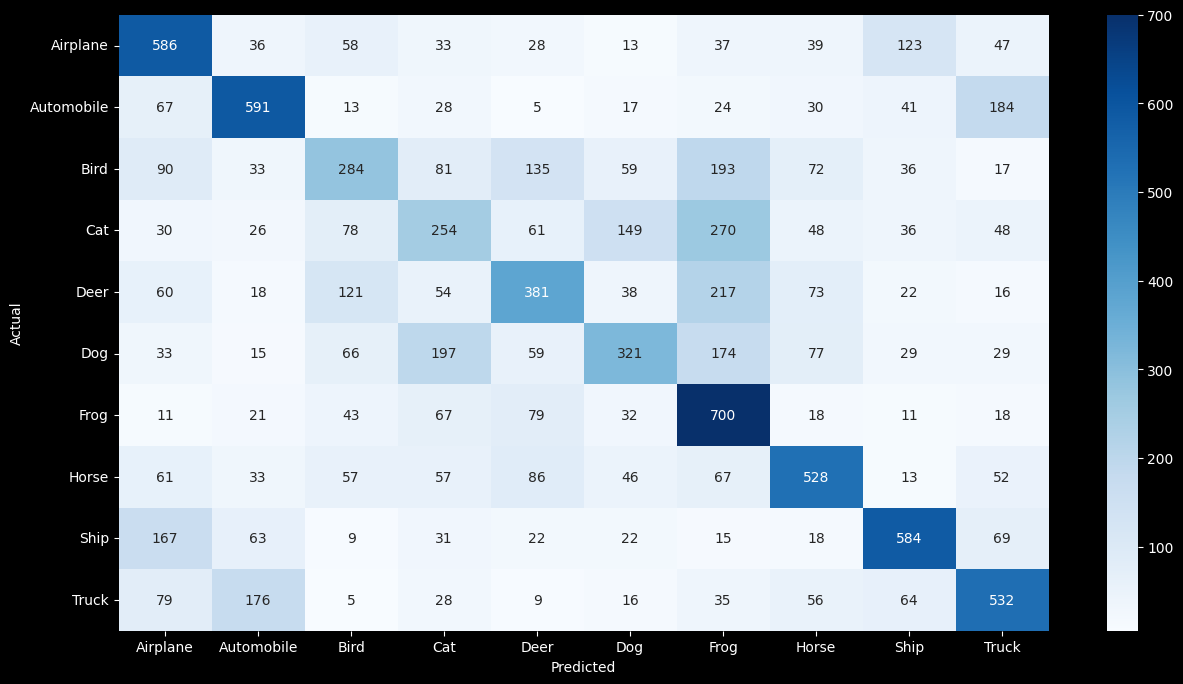

In [ ]:
# Plot classification report and confusion matrix for the test set

y_pred_classes = cifar_mlp_model.predict(x_test_cifar).argmax(axis=1)
y_true_classes = y_test_cifar.argmax(axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=class_names_cifar10))

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_cifar10, yticklabels=class_names_cifar10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## CIFAR-10 CNN

### Building and Training the CNN Model

In this section, we design and train a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset across 10 categories. Unlike the previous MLP model, which struggled to achieve high accuracy due to its fully connected nature, CNNs are specifically designed to recognize patterns in image data by leveraging spatial hierarchies.

Model Architecture:
The CNN model follows a layered approach, starting with 3 convolutional layers that extract low-to-high-level features such as edges, textures, and shapes. These layers use:

* 3x3 filters to detect patterns in the image
* ReLU activation to introduce non-linearity
* Batch Normalization to stabilize and speed up training
* Max Pooling to reduce dimensionality while preserving key features

After feature extraction, the network flattens the extracted features and passes them through fully connected dense layers with dropout regularization to prevent overfitting. The final softmax output layer assigns probabilities for each of the 10 categories.

Training Strategy:
We train the model using:

* Adam optimizer for adaptive learning
* Categorical cross-entropy loss for multi-class classification
* Early stopping to prevent unnecessary training when validation loss stops improving
* Learning rate reduction to fine-tune learning when progress slows down

Finally, we evaluate the model on the test set to assess its generalization performance.

In [ ]:
# Build CNN Model using Functional API
def build_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    """Builds and returns the CNN model using the functional API."""
    inputs = Input(shape=input_shape, name="Input")

    # Convolutional and Pooling Layers
    x = Conv2D(32, (3,3), activation='relu', padding='same', name="Conv1")(inputs)
    x = BatchNormalization(name="BatchNorm1")(x)
    x = MaxPooling2D((2,2), name="MaxPool1")(x)

    x = Conv2D(64, (3,3), activation='relu', padding='same', name="Conv2")(x)
    x = BatchNormalization(name="BatchNorm2")(x)
    x = MaxPooling2D((2,2), name="MaxPool2")(x)

    x = Conv2D(128, (3,3), activation='relu', padding='same', name="Conv3")(x)
    x = BatchNormalization(name="BatchNorm3")(x)
    x = MaxPooling2D((2,2), name="MaxPool3")(x)

    # Fully Connected Layers
    x = Flatten(name="Flatten")(x)
    x = Dense(256, activation='relu', name="Dense1")(x)
    x = Dropout(0.4, name="Dropout1")(x)
    x = Dense(128, activation='relu', name="Dense2")(x)
    x = Dropout(0.3, name="Dropout2")(x)

    # Output Layer
    outputs = Dense(num_classes, activation='softmax', name="Output")(x)

    # Create Model
    model = Model(inputs=inputs, outputs=outputs, name="CIFAR_CNN_Model")
    return model

# Compile Model
def compile_model(model, optimizer):
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Model
def train_model(model, x_train, y_train, epochs, batch_size,patience):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    # reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.1,
                        callbacks=[early_stopping])
    return history

# Evaluate Model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    return test_loss, test_acc

# Define Parameters

optimizer = Adam(learning_rate=0.001)
epochs = 50
batch_size = 64
patience=5

# Run Workflow

cifar_cnn_model = build_cnn_model()
cifar_cnn_model = compile_model(cifar_cnn_model, optimizer)
cifar_cnn_history = train_model(cifar_cnn_model, x_train_cifar, y_train_cifar, epochs, batch_size,patience=patience)
evaluate_model(cifar_cnn_model, x_test_cifar, y_test_cifar)

# Print model summary
cifar_cnn_model.summary()

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3397 - loss: 1.9084 - val_accuracy: 0.4918 - val_loss: 1.3768
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5600 - loss: 1.2484 - val_accuracy: 0.5860 - val_loss: 1.1470
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6454 - loss: 1.0171 - val_accuracy: 0.6016 - val_loss: 1.1333
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7006 - loss: 0.8540 - val_accuracy: 0.6754 - val_loss: 0.9093
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7412 - loss: 0.7610 - val_accuracy: 0.7198 - val_loss: 0.8348
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7621 - loss: 0.6842 - val_accuracy: 0.7336 - val_loss: 0.7919
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7931 - loss: 0.6119 - val_accuracy: 0.7478 - val_loss: 0.7610
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8127 - loss: 0.5457 - val_accuracy: 

Model: "CIFAR_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1 (Conv2D)                       │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm1 (BatchNormalization)      │ (None, 32, 32, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool1 (MaxPooling2D)              │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm2 (BatchNormalization)      │ (None, 16, 16, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2 (MaxPooling2D)              │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm3 (BatchNormalization)      │ (None, 8, 8, 128)           │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool3 (MaxPooling2D)              │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout1 (Dropout)                   │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout2 (Dropout)                   │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,957,728 (7.47 MB)

 Trainable params: 652,426 (2.49 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,304,854 (4.98 MB)

### Plotting and Evaluating the CNN Performance for CIFAR-10

In this section, we plot the training and validation accuracy/loss curves to analyze the model’s learning progress and evaluate its performance on the test set. Compared to the MLP model, which achieved around 50% accuracy, the CNN significantly improves performance, reaching approximately 75% test accuracy. This highlights the advantage of CNNs in capturing spatial patterns and hierarchical features in image classification tasks.

Upon closer inspection of the model’s misclassifications, we observe that it tends to confuse objects that share similar visual characteristics. For example, the model sometimes misclassifies airplanes as birds due to their similar shapes in certain angles, or cats as dogs because of their comparable features. These errors suggest that while the CNN effectively extracts meaningful features, further improvements could be made by incorporating techniques such as data augmentation or deeper architectures to enhance class differentiation.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7569 - loss: 0.7526
Test Accuracy: 0.7518
Test Loss: 0.7752


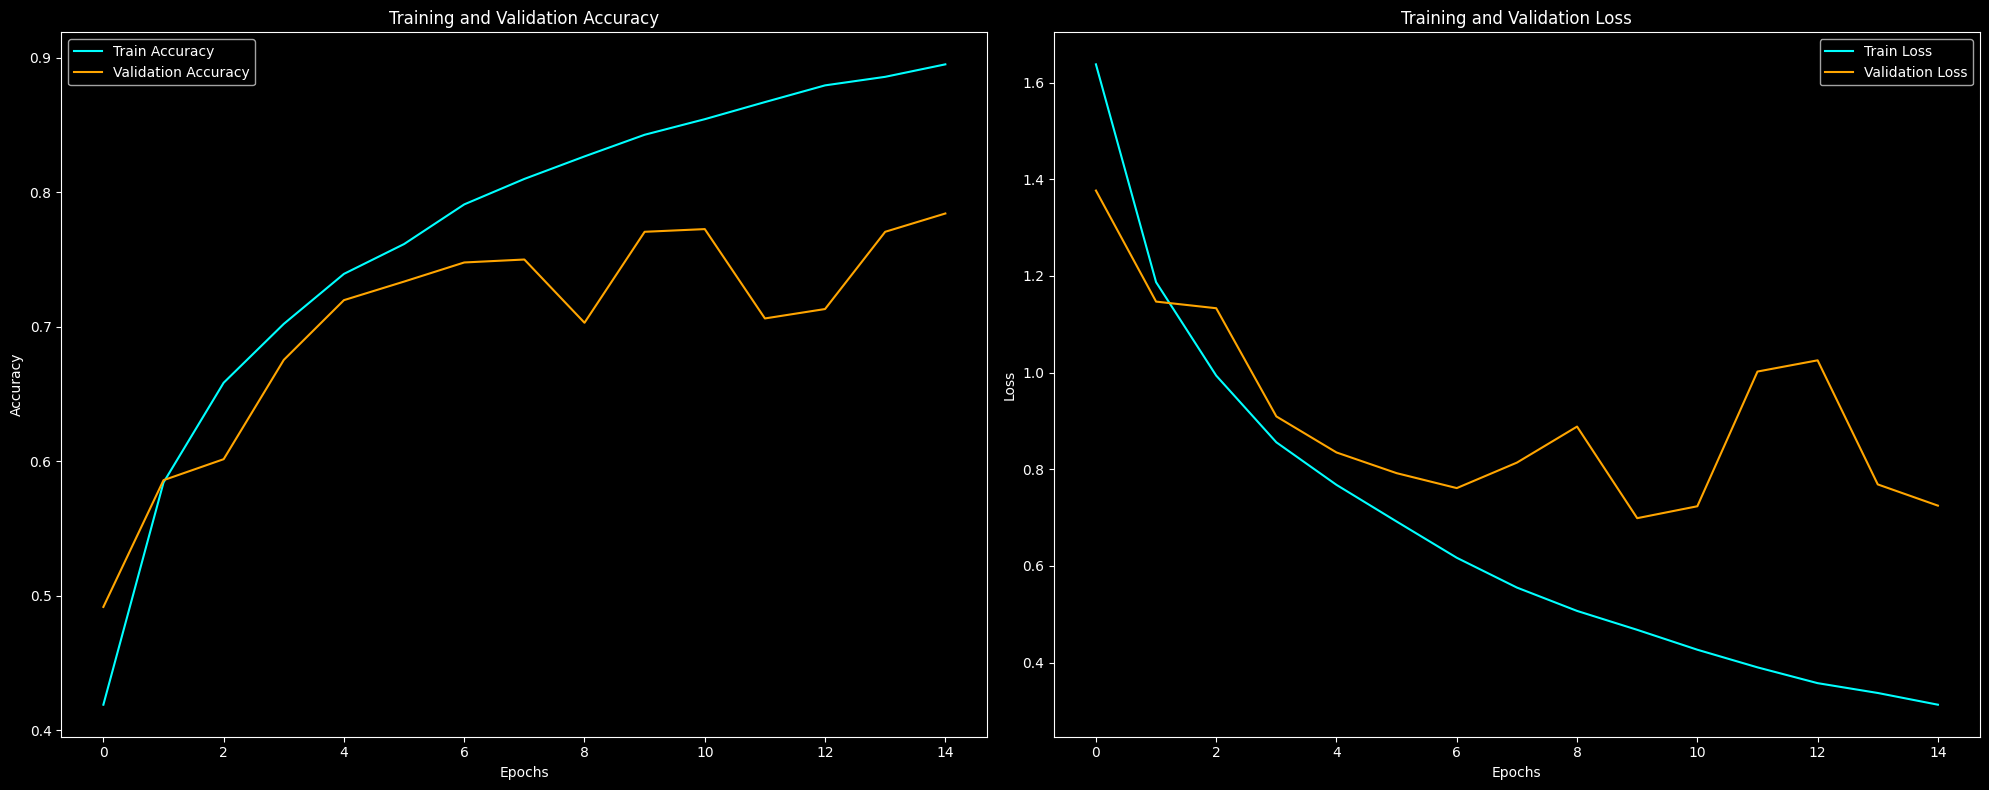

Train Loss     : 0.31268
Validation Loss: 0.72471
Test Loss      : 0.77520
---
Train Accuracy     : 0.89504
Validation Accuracy: 0.78420
Test Accuracy      : 0.75180


In [ ]:
# Retrieve accuracy and loss data from training history
train_accuracy = cifar_cnn_history.history['accuracy']
val_accuracy = cifar_cnn_history.history['val_accuracy']
train_loss = cifar_cnn_history.history['loss']
val_loss = cifar_cnn_history.history['val_loss']
test_loss, test_acc = evaluate_model(cifar_cnn_model, x_test_cifar, y_test_cifar)


# Set up the figure
plt.figure(figsize=(20, 8))
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [15, 8]

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy', color='cyan')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', color='cyan')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()



print("Train Loss     : {0:.5f}".format(cifar_cnn_history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(cifar_cnn_history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(test_loss))
print("---")
print("Train Accuracy     : {0:.5f}".format(cifar_cnn_history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(cifar_cnn_history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

    Airplane       0.80      0.78      0.79      1000
  Automobile       0.85      0.89      0.87      1000
        Bird       0.68      0.64      0.66      1000
         Cat       0.61      0.46      0.52      1000
        Deer       0.76      0.70      0.73      1000
         Dog       0.60      0.75      0.67      1000
        Frog       0.69      0.89      0.78      1000
       Horse       0.86      0.76      0.80      1000
        Ship       0.89      0.80      0.84      1000
       Truck       0.81      0.84      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



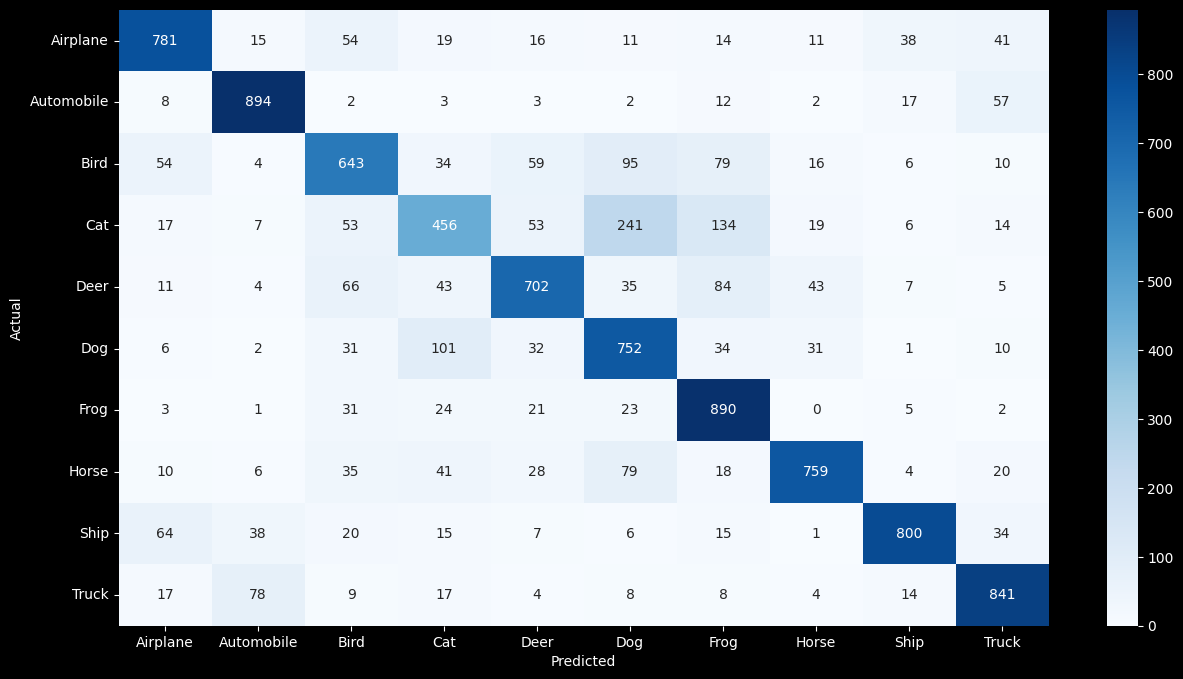

In [ ]:
# Plot classification report and confusion matrix for the test set

y_pred_classes = cifar_cnn_model.predict(x_test_cifar).argmax(axis=1)
y_true_classes = y_test_cifar.argmax(axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=class_names_cifar10))

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_cifar10, yticklabels=class_names_cifar10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Fine tune and find the best model for CIFAR10

## Fine tuning to identify the best model

To improve our CNN model’s performance on the CIFAR-10 dataset, we applied hyperparameter tuning using Keras Tuner. The goal of fine-tuning is to systematically explore different configurations and identify the optimal set of hyperparameters that yield the highest accuracy while maintaining generalization.

We used Random Search to test different values for key parameters, including:

* Number of filters in convolutional layers (e.g., 32, 64, 128)
* Dropout rates to prevent overfitting
* Number of neurons in dense layers (e.g., 128, 256, 512)
* Learning rates for the Adam optimizer

To ensure efficient training and avoid unnecessary computation, we:

* Limited the number of trials to 20, evaluating only the most promising models.
* Used Early Stopping to halt training when validation performance stopped improving.
* Applied Learning Rate Reduction to adjust learning speed dynamically when progress slowed.

Once the best hyperparameters were found, we retrained the model using the optimal configuration and evaluated its final performance on the test set. This approach led to a more efficient and better-performing CNN for classifying CIFAR-10 images.

In [ ]:
 pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time
from tqdm import tqdm  # Progress bar

# Function to build the model with tunable hyperparameters
def build_model(hp):
    inputs = Input(shape=(32, 32, 3), name="Input")

    # Convolutional layers with limited choices
    x = Conv2D(hp.Choice('conv1_filters', [32, 64, 128]), (3,3), activation='relu', padding='same', name="Conv1")(inputs)
    x = BatchNormalization(name="BatchNorm1")(x)
    x = MaxPooling2D((2,2), name="MaxPool1")(x)
    x = Dropout(hp.Choice('dropout1', [0.2, 0.3]), name="Dropout1")(x)

    x = Conv2D(hp.Choice('conv2_filters', [64, 128, 256]), (3,3), activation='relu', padding='same', name="Conv2")(x)
    x = BatchNormalization(name="BatchNorm2")(x)
    x = MaxPooling2D((2,2), name="MaxPool2")(x)
    x = Dropout(hp.Choice('dropout2', [0.2, 0.3]), name="Dropout2")(x)

    x = Conv2D(hp.Choice('conv3_filters', [128, 256, 512]), (3,3), activation='relu', padding='same', name="Conv3")(x)
    x = BatchNormalization(name="BatchNorm3")(x)
    x = MaxPooling2D((2,2), name="MaxPool3")(x)
    x = Dropout(hp.Choice('dropout3', [0.2, 0.3]), name="Dropout3")(x)

    # Fully Connected Layers with fewer options
    x = Flatten(name="Flatten")(x)
    x = Dense(hp.Choice('dense1_units', [128, 256, 512]), activation='relu', name="Dense1")(x)
    x = Dropout(hp.Choice('dropout4', [0.3, 0.4]), name="Dropout4")(x)

    x = Dense(hp.Choice('dense2_units', [64, 128, 256]), activation='relu', name="Dense2")(x)
    x = Dropout(hp.Choice('dropout5', [0.3, 0.4]), name="Dropout5")(x)

    # Output layer
    outputs = Dense(10, activation='softmax', name="Output")(x)

    model = Model(inputs=inputs, outputs=outputs, name="Tuned_CIFAR_CNN_Model")

    # Compile model with reduced learning rate choices
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-3, 5e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Define tuner using RandomSearch with limited trials
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # Limits to 20 different models
    executions_per_trial=1,  # Runs each model once
    directory='keras_tuner',
    project_name='cifar10_cnn_tuning_fast'
)

# Display search space summary
tuner.search_space_summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1, min_lr=1e-6)

# Start hyperparameter search with time tracking
print("Starting Hyperparameter Tuning...\n")
start_time = time.time()

for _ in tqdm(range(20), desc="Tuning Progress", unit="trial"):
    tuner.search(
        x_train_cifar, y_train_cifar,
        epochs=30,  # Reduced from 50 to 30
        validation_split=0.1,
        batch_size=64,
        callbacks=[early_stopping, reduce_lr]
    )

end_time = time.time()
print(f"\nTotal tuning time: {end_time - start_time:.2f} seconds\n")

# Get best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
print("Training Best Model...\n")
history = best_model.fit(
    x_train_cifar, y_train_cifar,
    epochs=30,  # Matches hyperparameter search
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the best model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"Test accuracy: {test_acc:.4f}")

evaluate_model(best_model, x_test_cifar, y_test_cifar)

# Print the best hyperparameters
print("\nBest Hyperparameters Found:")
print(best_hps.values)


Tuning Progress: 100%|██████████| 20/20 [28:04<00:00, 84.22s/trial]   

Trial 20 Complete [00h 01m 51s]
val_accuracy: 0.8194000124931335

Best val_accuracy So Far: 0.8288000226020813
Total elapsed time: 00h 28m 04s

Total tuning time: 1684.37 seconds

Training Best Model...



Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.2396 - loss: 2.1957 - val_accuracy: 0.4758 - val_loss: 1.4444 - learning_rate: 0.0010
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4534 - loss: 1.5178 - val_accuracy: 0.5630 - val_loss: 1.2025 - learning_rate: 0.0010
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5487 - loss: 1.2806 - val_accuracy: 0.6324 - val_loss: 1.0478 - learning_rate: 0.0010
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6198 - loss: 1.1041 - val_accuracy: 0.6550 - val_loss: 0.9881 - learning_rate: 0.0010
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6646 - loss: 0.9899 - val_accuracy: 0.7190 - val_loss: 0.8059 - learning_rate: 0.0010
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6964 - loss: 0.8999
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6964 - loss: 0.8999 -

## Load best model

In [ ]:
# Save the best model locally
best_model.save("best_cifar10_model.h5")
print("\nBest model saved as 'best_cifar10_model.h5'")



Best model saved as 'best_cifar10_model.h5'


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
best_cifar_cnn_model = load_model("best_cifar10_model.h5")

# Check the model summary
best_cifar_cnn_model.summary()


Model: "Tuned_CIFAR_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1 (Conv2D)                       │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm1 (BatchNormalization)      │ (None, 32, 32, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool1 (MaxPooling2D)              │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout1 (Dropout)                   │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm2 (BatchNormalization)      │ (None, 16, 16, 256)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2 (MaxPooling2D)              │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout2 (Dropout)                   │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 8, 8, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BatchNorm3 (BatchNormalization)      │ (None, 8, 8, 128)           │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool3 (MaxPooling2D)              │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout3 (Dropout)                   │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout4 (Dropout)                   │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout5 (Dropout)                   │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,137,484 (4.34 MB)

 Trainable params: 1,136,458 (4.34 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 2 (12.00 B)

## Plotting and Evaluating the best CNN model's performance for CIFAR-10

After fine-tuning, the test accuracy improved from 75% to 81%, demonstrating the effectiveness of optimizing hyperparameters. This improvement highlights the importance of selecting the right model configuration to maximize performance while preventing overfitting.

In [ ]:
evaluate_model(best_cifar_cnn_model, x_test_cifar, y_test_cifar)

313/313 - 2s - 7ms/step - accuracy: 0.8105 - loss: 0.5915
Test accuracy: 0.8105


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
              precision    recall  f1-score   support

    Airplane       0.83      0.85      0.84      1000
  Automobile       0.90      0.90      0.90      1000
        Bird       0.74      0.68      0.71      1000
         Cat       0.68      0.61      0.64      1000
        Deer       0.74      0.82      0.77      1000
         Dog       0.73      0.72      0.72      1000
        Frog       0.81      0.89      0.85      1000
       Horse       0.86      0.85      0.86      1000
        Ship       0.89      0.93      0.91      1000
       Truck       0.89      0.87      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



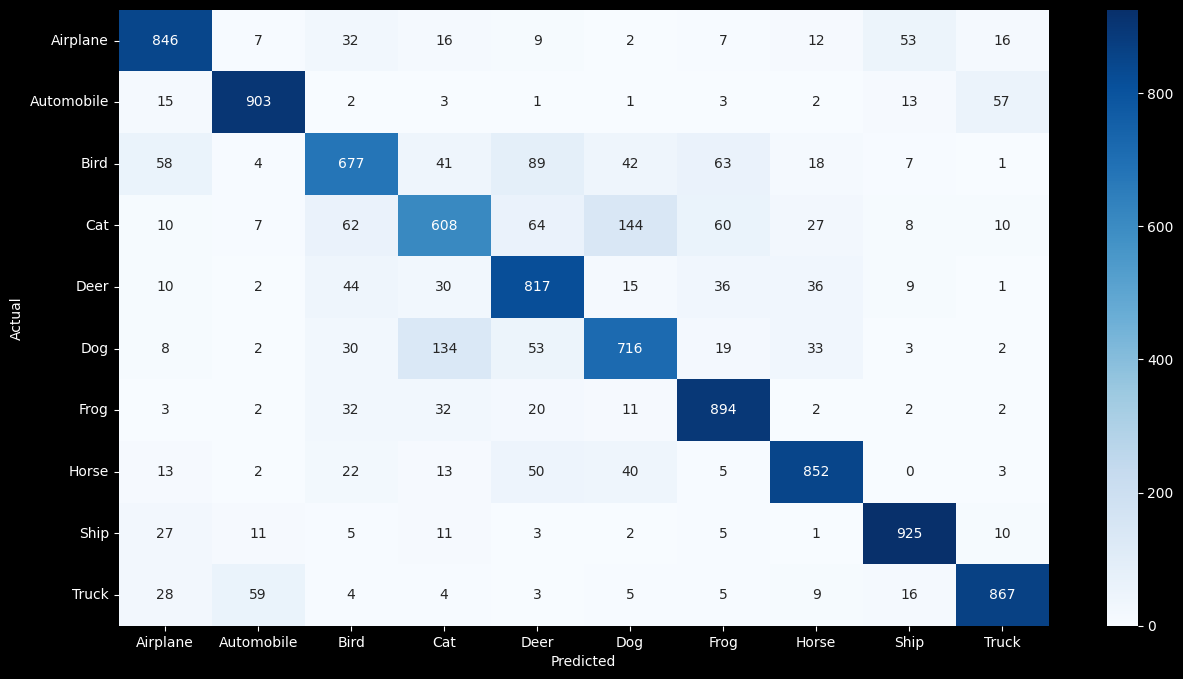

In [ ]:
# Plot classification report and confusion matrix for the test set

y_pred_classes = best_cifar_cnn_model.predict(x_test_cifar).argmax(axis=1)
y_true_classes = y_test_cifar.argmax(axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=class_names_cifar10))

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_cifar10, yticklabels=class_names_cifar10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Conclusion

In this exercise, we explored different deep learning architectures for image classification on the CIFAR-10 dataset.

We started with a baseline model, which achieved an accuracy of 38%, highlighting the challenge of classifying complex images with simple approaches. Next, we implemented a Multilayer Perceptron (MLP), which improved performance slightly to 48%, but still struggled due to its lack of spatial feature extraction. The Convolutional Neural Network (CNN) significantly boosted accuracy to 75%, demonstrating the power of convolutional layers in recognizing patterns and spatial hierarchies. Finally, through hyperparameter tuning, including optimizing layer sizes, dropout rates, and learning rates, we further improved the CNN’s accuracy to 81%, achieving the best performance in our experiments.

These results emphasize the importance of architectural choices and fine-tuning in deep learning models. While MLPs provide a basic understanding of the dataset, CNNs effectively capture spatial relationships, making them much more suitable for image classification. The performance gap between the untuned and fine-tuned CNN also highlights how systematic tuning can make a significant difference in model accuracy. Future improvements could explore data augmentation, deeper networks, or transfer learning to push the accuracy even higher.